<a href="https://colab.research.google.com/github/greensky0107/first_repository/blob/master/Day34_MainQuest06_HousingPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 캐글 참여 링크

https://www.kaggle.com/t/05f287fe67bb43298d8c3e66a1e71c27

# House Prices 🏠

#Step 1 Library와 Dataset 불러오기

In [44]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
house_df_org = pd.read_csv('/content/sample_data/house_price_train.csv')
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2,696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000


In [46]:
house_df_test_org = pd.read_csv('/content/sample_data/house_price_test.csv')
house_test_df = house_df_test_org.copy()
house_test_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,86,60,RL,121.0,16059,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
1,227,60,RL,82.0,9950,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Abnorml
2,492,50,RL,79.0,9490,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,8,2006,WD,Normal


#Step 2 Exloratory Data Analysis

1. Data 확인
    - Train Dataset 은 1168rows x 81columns.   Data entry는 적으며, feature는 많음
    - target 은 salesprice (81번째 column)
    - feature가 많으니, 불필요한 column은 최대한 삭제.
    - missing value가 많은 column 확인
    - 각 column별 data type 확인 :  Object인 column이 43개임. (처리 필요)
    
    - Test Dataset 은 292rows x 80columns임

In [47]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    950 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          70 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [48]:
house_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    251 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          21 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

#Step 2 Exploratory Data Analysis

2. Data Processing

  - correlation heatmap으로  상관이 적은 feature 골라냄

  - missing value가 많은 6개 feature(PoolQC, MiscFeature, Alley, Fence, MasVnrType, FireplaceQu, LotFrontage)는 drop

  - ID도 필요없으므로 drop

  - SalePrice와 correlation이 낮은 colums 들 (MSSubClass, LotArea, OverallCond, 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr' , 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold') 은 drop

  - missing value는 각 feature의 평균값으로 채우기

  - target인 SalePrice의 data 분포확인했더니,  정규분포화 필요

  - SalePrice에 log 적용해서 정규분포화

  - Data type이 object인 feature중에서 SalePrice와 correlation 이 낮은 feature를 골라서 drop

  - 최종 36개 feature에 대해서 one hot encoding 해서, 모두 숫자로 바꿔줌

  - One Hot Encoding 후 column은 150개임



In [49]:
#Train Dataset의 종류와 Missing Value가 많은 feature 확인

print('데이터 세트의 Shape:', house_df.shape)
print('\n전체 feature 들의 type \n',house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (1168, 81)

전체 feature 들의 type 
 object     43
int64      35
float64     3
Name: count, dtype: int64

Null 컬럼과 그 건수:
  PoolQC          1162
MiscFeature     1120
Alley           1098
Fence            941
MasVnrType       694
FireplaceQu      545
LotFrontage      218
GarageType        69
GarageYrBlt       69
GarageFinish      69
GarageQual        69
GarageCond        69
BsmtExposure      24
BsmtFinType2      24
BsmtQual          23
BsmtCond          23
BsmtFinType1      23
MasVnrArea         8
Electrical         1
dtype: int64


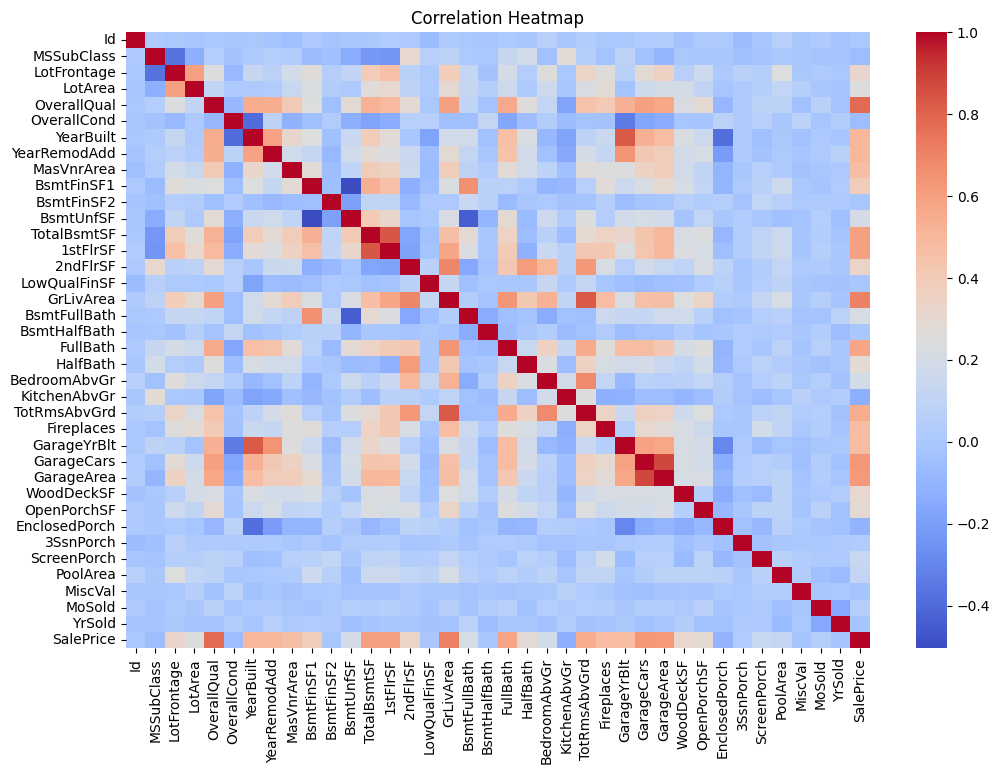

In [50]:
# Correlation heatmap으로 상관관계 높은 feature 확인
numeric_cols = house_df.select_dtypes(include=[np.number]).columns
corr = house_df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

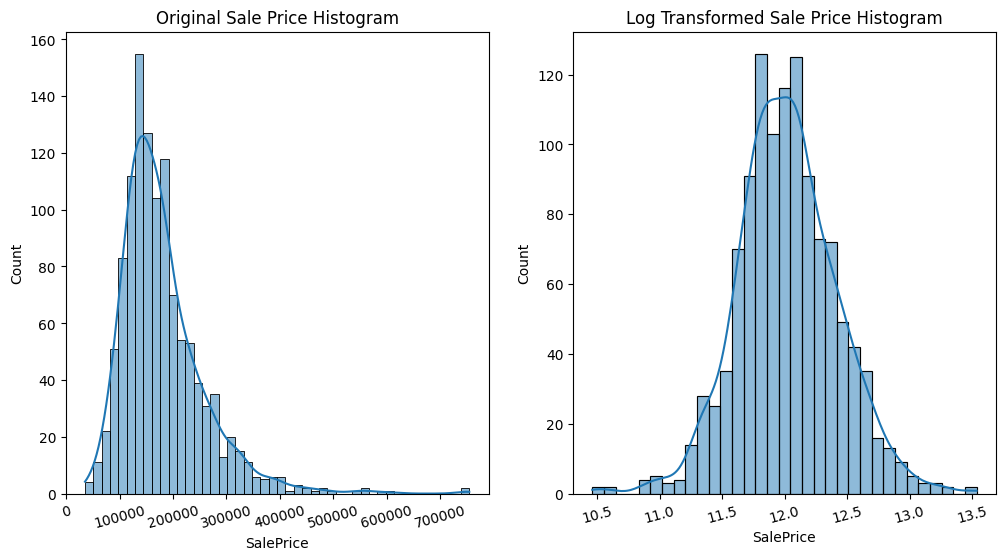

In [51]:
#Sale Price의 분포 확인하고,Sale Price에 log를 취하면 정규분포화 되는 지 확인

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 첫 번째 subplot: 원본 SalePrice 히스토그램
sns.histplot(house_df['SalePrice'], kde=True, ax=axes[0])
axes[0].set_title('Original Sale Price Histogram')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=15)

# 두 번째 subplot: 로그 변환된 SalePrice 히스토그램
log_SalePrice = np.log1p(house_df['SalePrice'])  # log(1 + x) 변환
sns.histplot(log_SalePrice, kde=True, ax=axes[1])
axes[1].set_title('Log Transformed Sale Price Histogram')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=15)

plt.show()


In [52]:
#Data Preprocessing (Null 이 너무 많은 컬럼들(7개 columns)과 불필요한 컬럼(ID) 삭제
house_df.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','MasVnrType', 'FireplaceQu','LotFrontage' ], axis=1 , inplace=True)

#Data Preprocessing (SalePrice와 correlation이 0.3 미만으로 낮은 칼럼 삭제)
house_df.drop(['MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr' , 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold'], axis=1 , inplace=True)

#Data Preprocessing (Null이 남아있는 컬럼들은 각 feature의 평균값으로 대체 - Missing Value 채우기)
# house_df.fillna(house_df.mean(),inplace=True)
num_cols = house_df.select_dtypes(include=['number']).columns
house_df[num_cols] = house_df[num_cols].fillna(house_df[num_cols].mean())

#Data Prerocessing (SalePrice 로그 변환)
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

house_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,SaleType,SaleCondition,SalePrice
0,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Unf,1,260,TA,TA,Y,0,WD,Normal,11.813037
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,NaN,0,0,NaN,NaN,Y,120,WD,Alloca,12.095147
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,...,Unf,2,551,TA,TA,Y,125,WD,Normal,12.078245
3,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,...,Fin,3,818,TA,TA,Y,168,New,Partial,12.669810
4,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,...,Unf,2,576,TA,TA,Y,0,WD,Normal,11.719134


In [53]:
print('\n전체 feature 들의 type \n',house_df.dtypes.value_counts())


전체 feature 들의 type 
 object     37
int64      14
float64     3
Name: count, dtype: int64


In [54]:
# object 43개의 SalePrice와 correlation 확인후, 몇개를 제거할 지 결정하는 코드

# Select object type columns
object_cols = house_df.select_dtypes(include=['object']).columns

# Calculate correlation for each object column with SalePrice after one-hot encoding
# We need to one-hot encode each object column individually to calculate correlation with SalePrice
corr_with_saleprice = {}
for col in object_cols:
    # Create a temporary dataframe with the current object column and SalePrice
    temp_df = house_df[[col, 'SalePrice']].copy()
    # One-hot encode the object column
    temp_df_ohe = pd.get_dummies(temp_df, columns=[col], drop_first=True) # Use drop_first to avoid multicollinearity
    # Calculate correlation of the one-hot encoded columns with SalePrice
    # We take the absolute value of the maximum correlation among the created dummy variables
    corr_values = temp_df_ohe.corr()['SalePrice'].drop('SalePrice').abs()
    if not corr_values.empty:
        corr_with_saleprice[col] = corr_values.max()
    else:
        corr_with_saleprice[col] = 0 # If no dummy variables are created (e.g., only one unique value)

# Convert the dictionary to a pandas Series for easy viewing and sorting
corr_series = pd.Series(corr_with_saleprice).sort_values(ascending=False)

print("Correlation with SalePrice for Object Type Features:")
print(corr_series)

Correlation with SalePrice for Object Type Features:
ExterQual        0.593994
KitchenQual      0.540664
Foundation       0.522575
BsmtQual         0.471525
BsmtFinType1     0.429856
GarageFinish     0.422302
GarageType       0.413276
GarageCond       0.361036
MSZoning         0.343178
CentralAir       0.337871
Neighborhood     0.334518
GarageQual       0.332518
Exterior1st      0.328466
Exterior2nd      0.328204
HeatingQC        0.326777
PavedDrive       0.326207
Electrical       0.311631
SaleType         0.307797
SaleCondition    0.302208
LotShape         0.274862
HouseStyle       0.261994
BsmtExposure     0.260718
RoofStyle        0.222684
ExterCond        0.209455
LotConfig        0.156567
Heating          0.135320
Functional       0.134951
BldgType         0.119186
BsmtCond         0.117453
LandContour      0.117126
Condition1       0.115355
RoofMatl         0.113707
BsmtFinType2     0.099818
Street           0.073528
Condition2       0.065049
LandSlope        0.044760
Utilities  

In [55]:
#상관계수 0.3 이하에서 감소폭이 커지는 Room Style부터 drop 하기
# Identify object columns with correlation less than 0.3
object_cols_to_drop = corr_series[corr_series < 0.3].index.tolist()

print(f"Dropping object columns with correlation < 0.3: {object_cols_to_drop}")

# Drop the identified columns from the DataFrame
house_df.drop(object_cols_to_drop, axis=1, inplace=True)

print("Shape after dropping low correlation object columns:", house_df.shape)

Dropping object columns with correlation < 0.3: ['LotShape', 'HouseStyle', 'BsmtExposure', 'RoofStyle', 'ExterCond', 'LotConfig', 'Heating', 'Functional', 'BldgType', 'BsmtCond', 'LandContour', 'Condition1', 'RoofMatl', 'BsmtFinType2', 'Street', 'Condition2', 'LandSlope', 'Utilities']
Shape after dropping low correlation object columns: (1168, 36)


In [56]:
#Data Preprocessing (Object type인 feature를 one hot encoding통해 숫자로 바꿔줌)
print('get_dummies() 수행 전 데이터 Shape:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 Shape:', house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape: (1168, 36)
get_dummies() 수행 후 데이터 Shape: (1168, 150)
## Null 피처의 Type :
 Series([], dtype: object)


#Step 3 Apply Regression Models to "Train-> Predict -> Validate",  Tune models with hyperparameter.

1. 선형회귀 모델 Linear, Ridge, Lasso 적용해서 RMSE 확인
    - train vs. test를 80:20으로 split해서 진행.
       - Ridge 0.149 > Linear 0.158 > Lasso 0.178로 Ridge가 제일 좋음
    - 3가지 모델의 각 feature별 회귀계수 확인해보니,  Lasso의 회귀계수의 제일 높은 갚이 0.0020으로 이상한 형태를 보임.
    - Train dataset split의 문제가 있는 지 확인하기 위해, 5 fold cross validation 으로 RMSE를 측정해 봄.
        - Ridge 0.156 > Linear 0.159 > Lasso 0.205로 Ridge가 제일 좋음.
    - Ridge와 Lasso의 hyperparameter tuing 위해서, grid search로 best alpha 구하기.
        - Ridge 0.5 Lasso 0.001 로 alpha regulation 하면 두 모델의 성능 개선됨
    - 다시 3가지 모델 비교해봄
        - Lasso 0.141 > Ridge 0.144 > Linear 0.158로 Lasso가 제일 좋음
        - Lasso의 회귀계수 분포도 개선됨.
    - 모델성능 개선을 위해, feature중 data 분포가 왜곡되어 있는 것을 찾아봄
    - Skew 정도가 1이상 높은 것 중, 회귀계수가 높은 GrLivArea feature의 정규분포화를 위해 log 변환해주고,  다시 one hot encoding 함
    - Ridge와 Lasso의 alpha 를 찾아 tuning 후 모델 성능 비교
        - Lasso 0.131 > Ridge 0.134 > Linear 0.149 로 성능 개선됨
    - 회귀 계수가 높은 GrLivArea와 SalePrice와의 분포도를 그려서, outlier가 있는 지 확인 후 outlier 2개를 drop
    - data entry가 2개 줄어든 1,166으로 다시 Ridge와 Lasso의 alpha를 찾아 tuning 후 모델 성능 비교
        - Lasso 0.130 > Ridge 0.133 > Linear 0.136으로 성능 개선됨
   
    

In [57]:
# RMSE 구하는 function 정의

def get_rmse(model):
    pred = model.predict(X_test)
    pred_exp = np.expm1(pred)
    mse = mean_squared_error(np.expm1(y_test) , pred_exp)
    mse2 = mean_squared_error(y_test , pred)
    rmse0 = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(np.sqrt(mse2), 3)))
    print('{0} 로그 변환된 MSE: {1}'.format(model.__class__.__name__,np.round(mse2, 3)))

    print('{0} 로그 변환해제 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse0, 3)))
    print('{0} 로그 변환해제 MSE: {1}'.format(model.__class__.__name__,np.round(mse, 3)))

    return rmse0

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [58]:
#Linear Regression, Ridge Regression, Lasso Regression을  trian vs. test =80:20 split으로  진행

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.158
LinearRegression 로그 변환된 MSE: 0.025
LinearRegression 로그 변환해제 RMSE: 27178.764
LinearRegression 로그 변환해제 MSE: 738685214.869
Ridge 로그 변환된 RMSE: 0.149
Ridge 로그 변환된 MSE: 0.022
Ridge 로그 변환해제 RMSE: 26487.582
Ridge 로그 변환해제 MSE: 701591981.507
Lasso 로그 변환된 RMSE: 0.178
Lasso 로그 변환된 MSE: 0.032
Lasso 로그 변환해제 RMSE: 34379.653
Lasso 로그 변환해제 MSE: 1181960550.474


[np.float64(27178.76404234415),
 np.float64(26487.581647008963),
 np.float64(34379.65314650178)]

In [59]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명.
    coef = pd.Series(model.coef_, index=X_features.columns)

    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

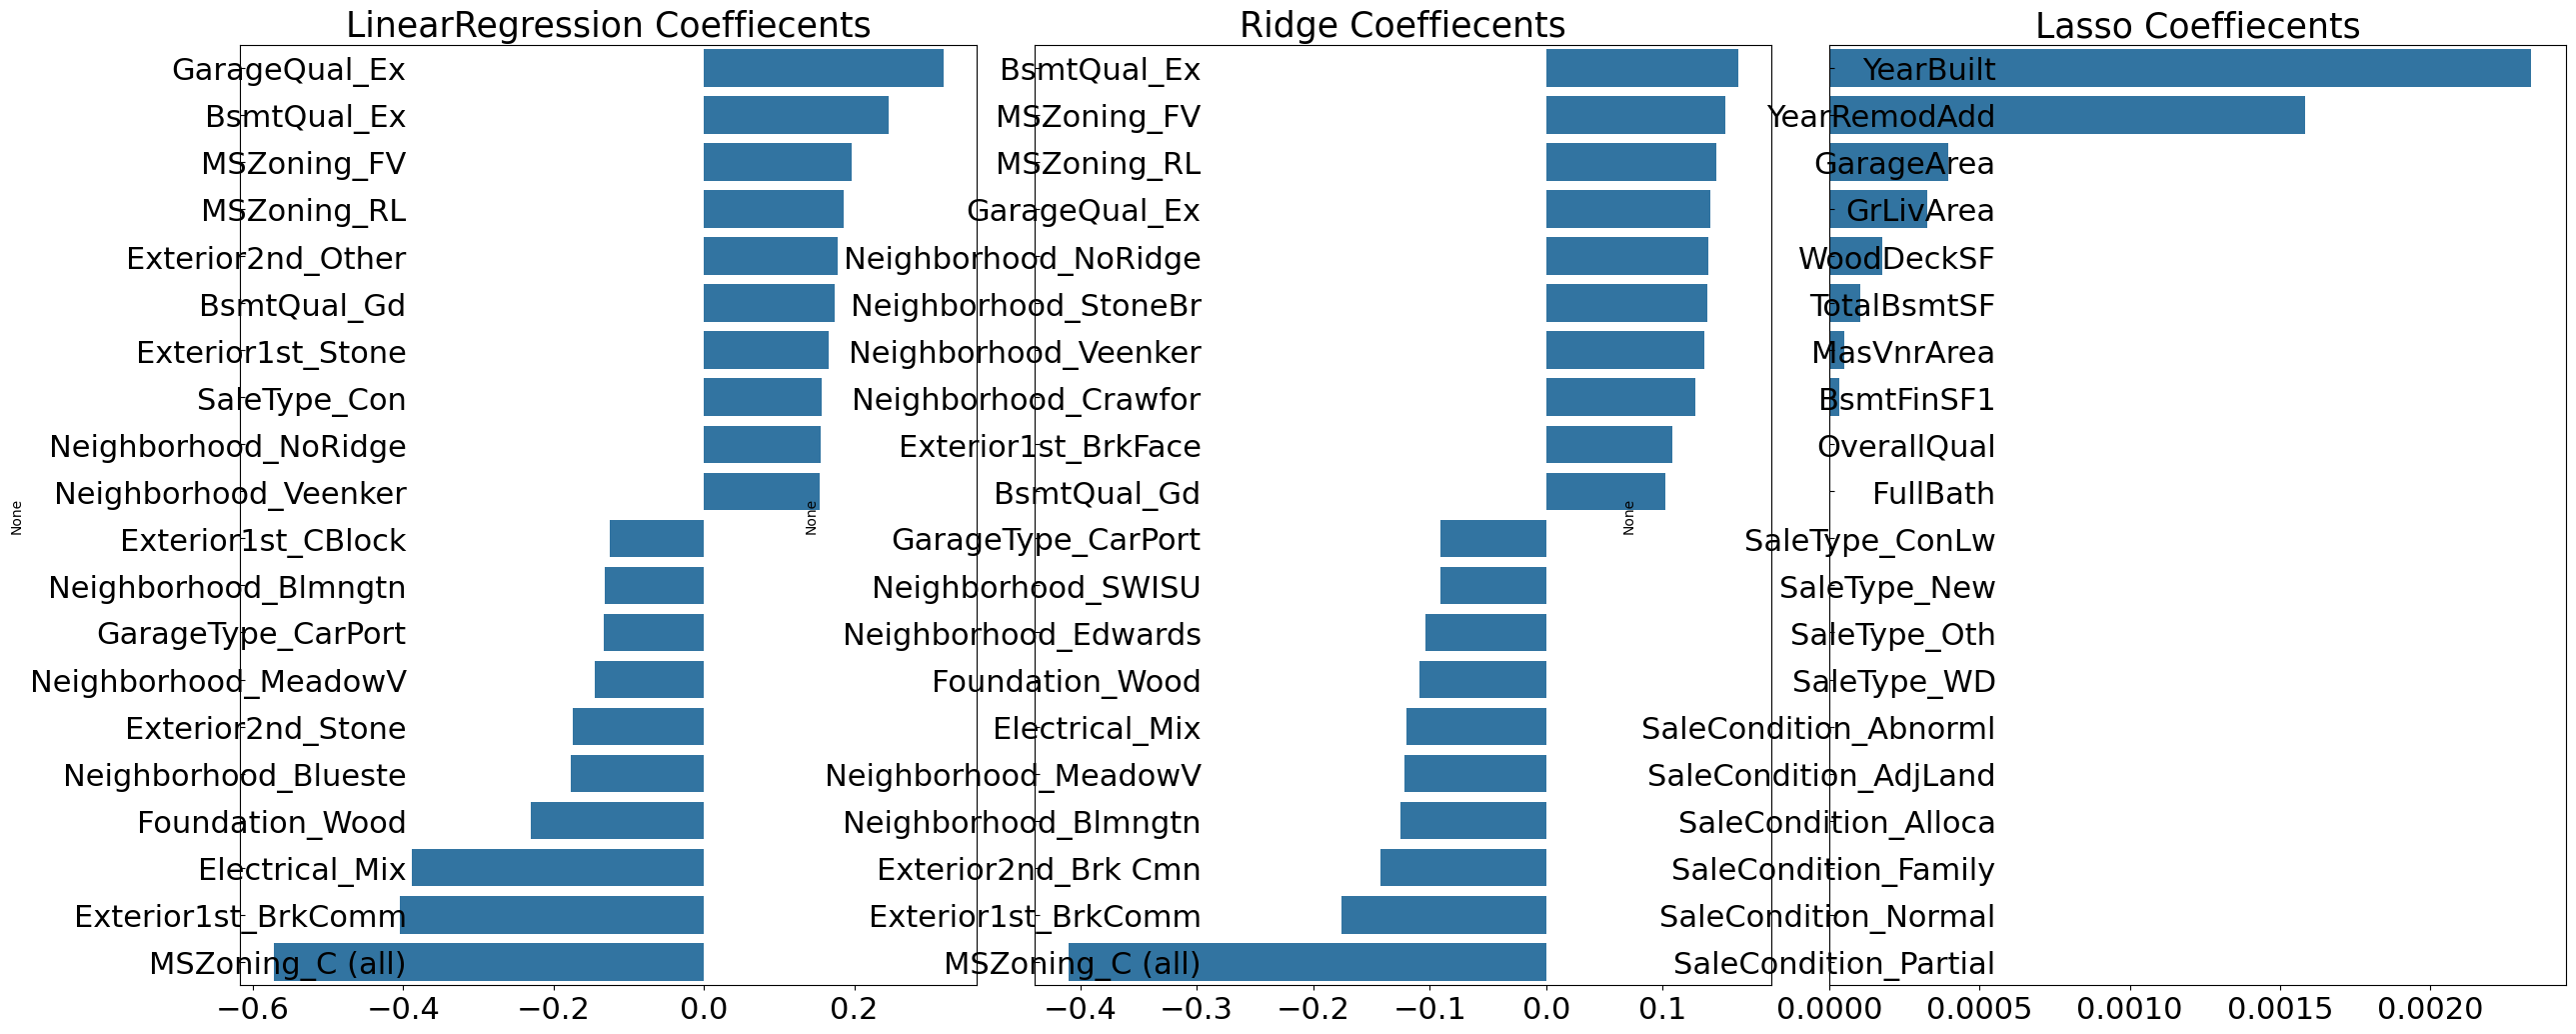

In [60]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout()
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화.
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합.
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정.
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [61]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.202 0.179 0.14  0.144 0.132]
LinearRegression CV 평균 RMSE 값: 0.159

Ridge CV RMSE 값 리스트: [0.202 0.174 0.133 0.143 0.13 ]
Ridge CV 평균 RMSE 값: 0.156

Lasso CV RMSE 값 리스트: [0.281 0.213 0.175 0.186 0.172]
Lasso CV 평균 RMSE 값: 0.205


In [62]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1575, 최적 alpha:{'alpha': 5}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1583, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.158
LinearRegression 로그 변환된 MSE: 0.025
LinearRegression 로그 변환해제 RMSE: 27178.764
LinearRegression 로그 변환해제 MSE: 738685214.869
Ridge 로그 변환된 RMSE: 0.144
Ridge 로그 변환된 MSE: 0.021
Ridge 로그 변환해제 RMSE: 26529.603
Ridge 로그 변환해제 MSE: 703819823.891
Lasso 로그 변환된 RMSE: 0.141
Lasso 로그 변환된 MSE: 0.02
Lasso 로그 변환해제 RMSE: 27391.813
Lasso 로그 변환해제 MSE: 750311406.007


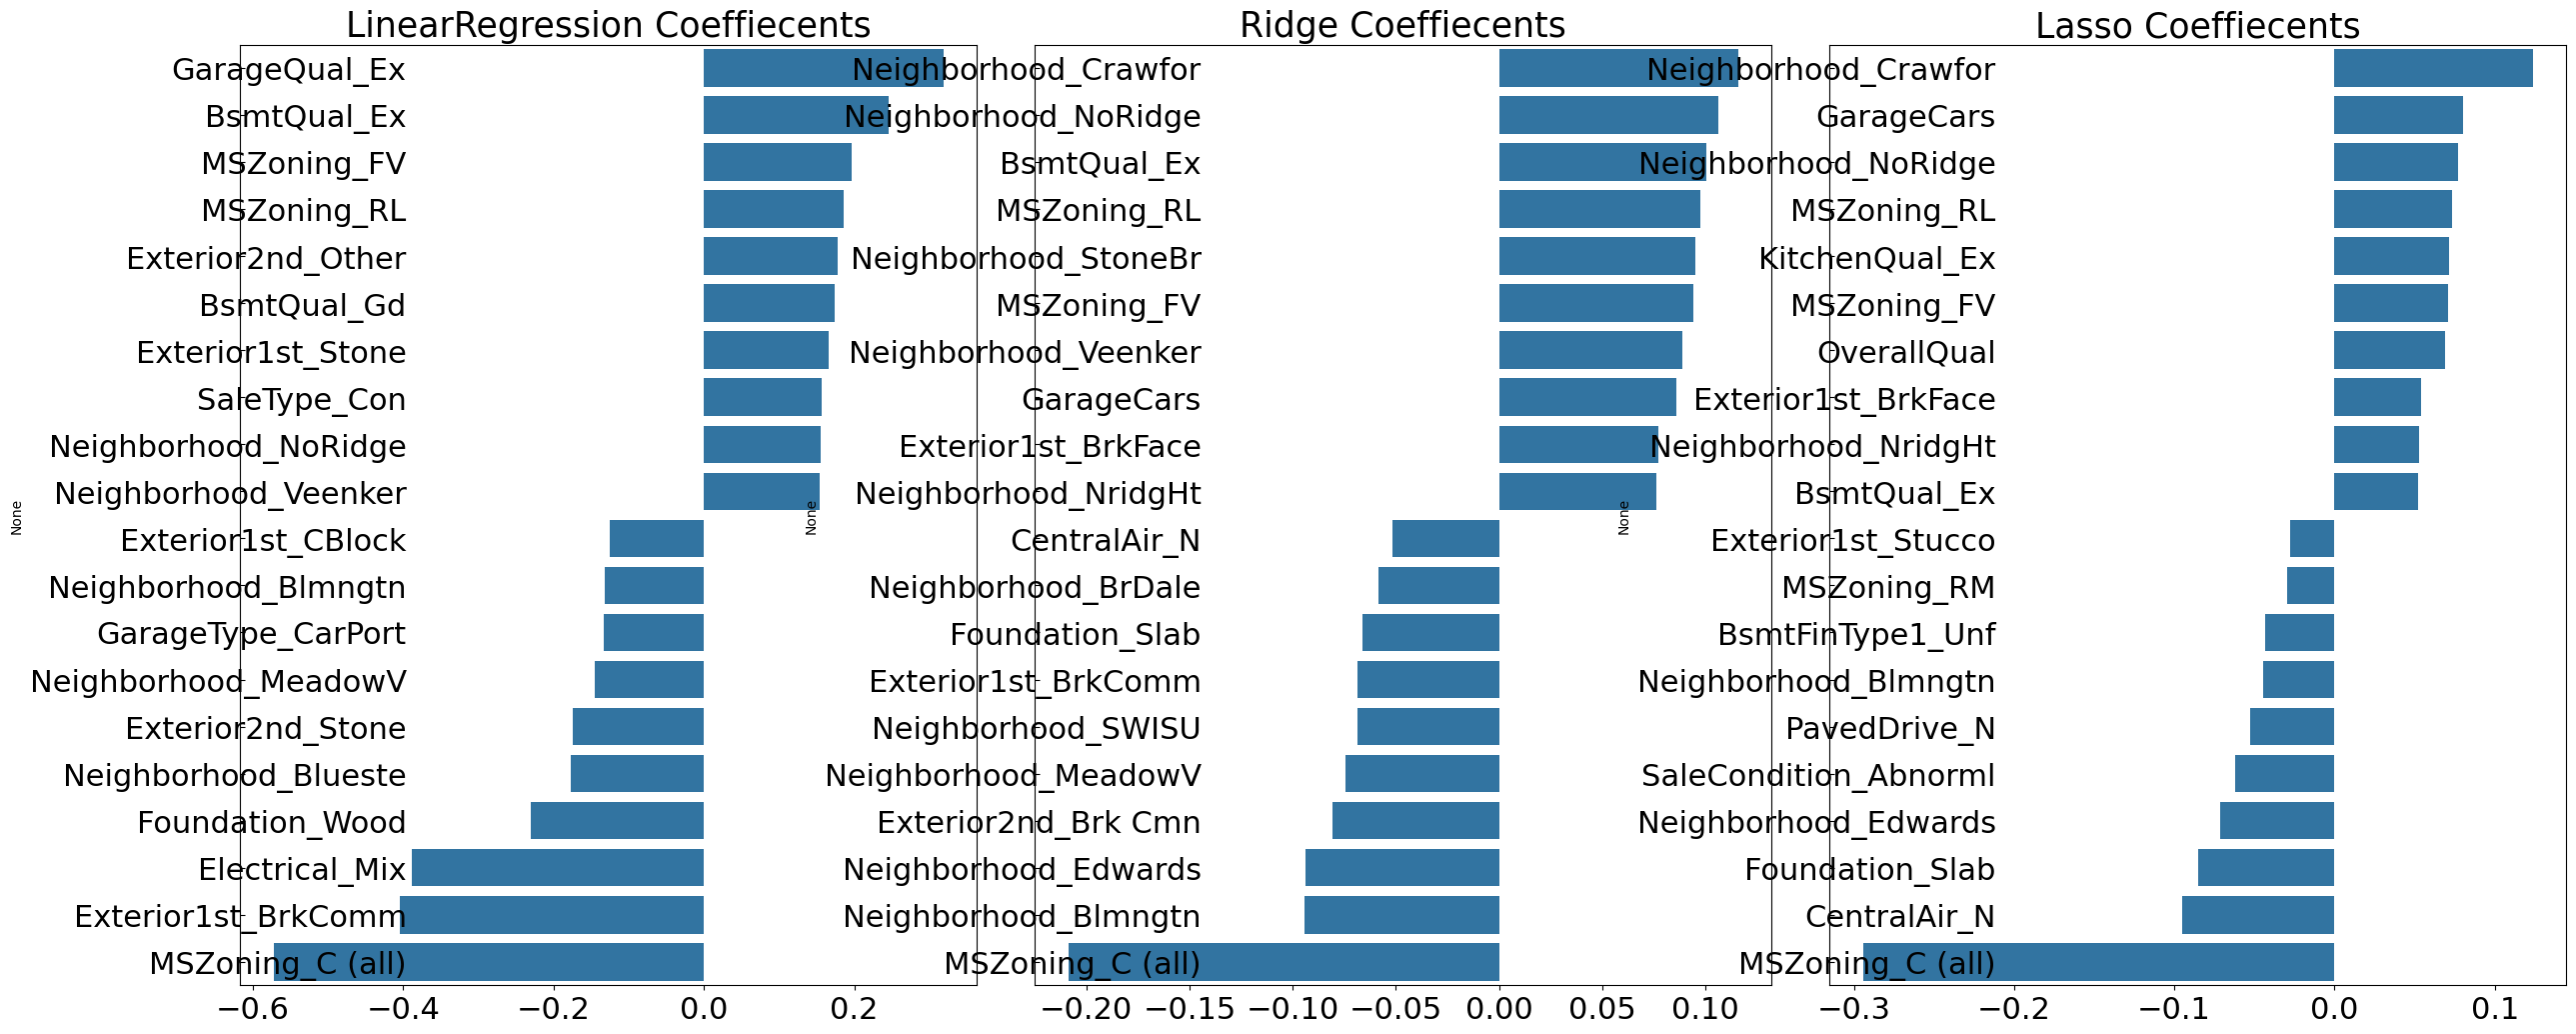

In [63]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=5)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [64]:
from scipy.stats import skew

# object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
features_index = house_df.dtypes[house_df.dtypes != 'object'].index
# house_df에 칼럼 index를 [ ]로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew( ) 호출
skew_features = house_df[features_index].apply(lambda x : skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MasVnrArea     2.418589
BsmtFinSF1     1.881057
TotalBsmtSF    1.864686
WoodDeckSF     1.546567
1stFlrSF       1.488257
GrLivArea      1.474257
dtype: float64


In [68]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [66]:
# Skew가 높은 피처들을 로그 변환 했으므로 다시 원-핫 인코딩 적용 및 피처/타겟 데이터 셋 생성,
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1431, 최적 alpha:{'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1428, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.149
LinearRegression 로그 변환된 MSE: 0.022
LinearRegression 로그 변환해제 RMSE: 26108.948
LinearRegression 로그 변환해제 MSE: 681677170.019
Ridge 로그 변환된 RMSE: 0.134
Ridge 로그 변환된 MSE: 0.018
Ridge 로그 변환해제 RMSE: 25947.811
Ridge 로그 변환해제 MSE: 673288883.248
Lasso 로그 변환된 RMSE: 0.131
Lasso 로그 변환된 MSE: 0.017
Lasso 로그 변환해제 RMSE: 26252.567
Lasso 로그 변환해제 MSE: 689197291.454


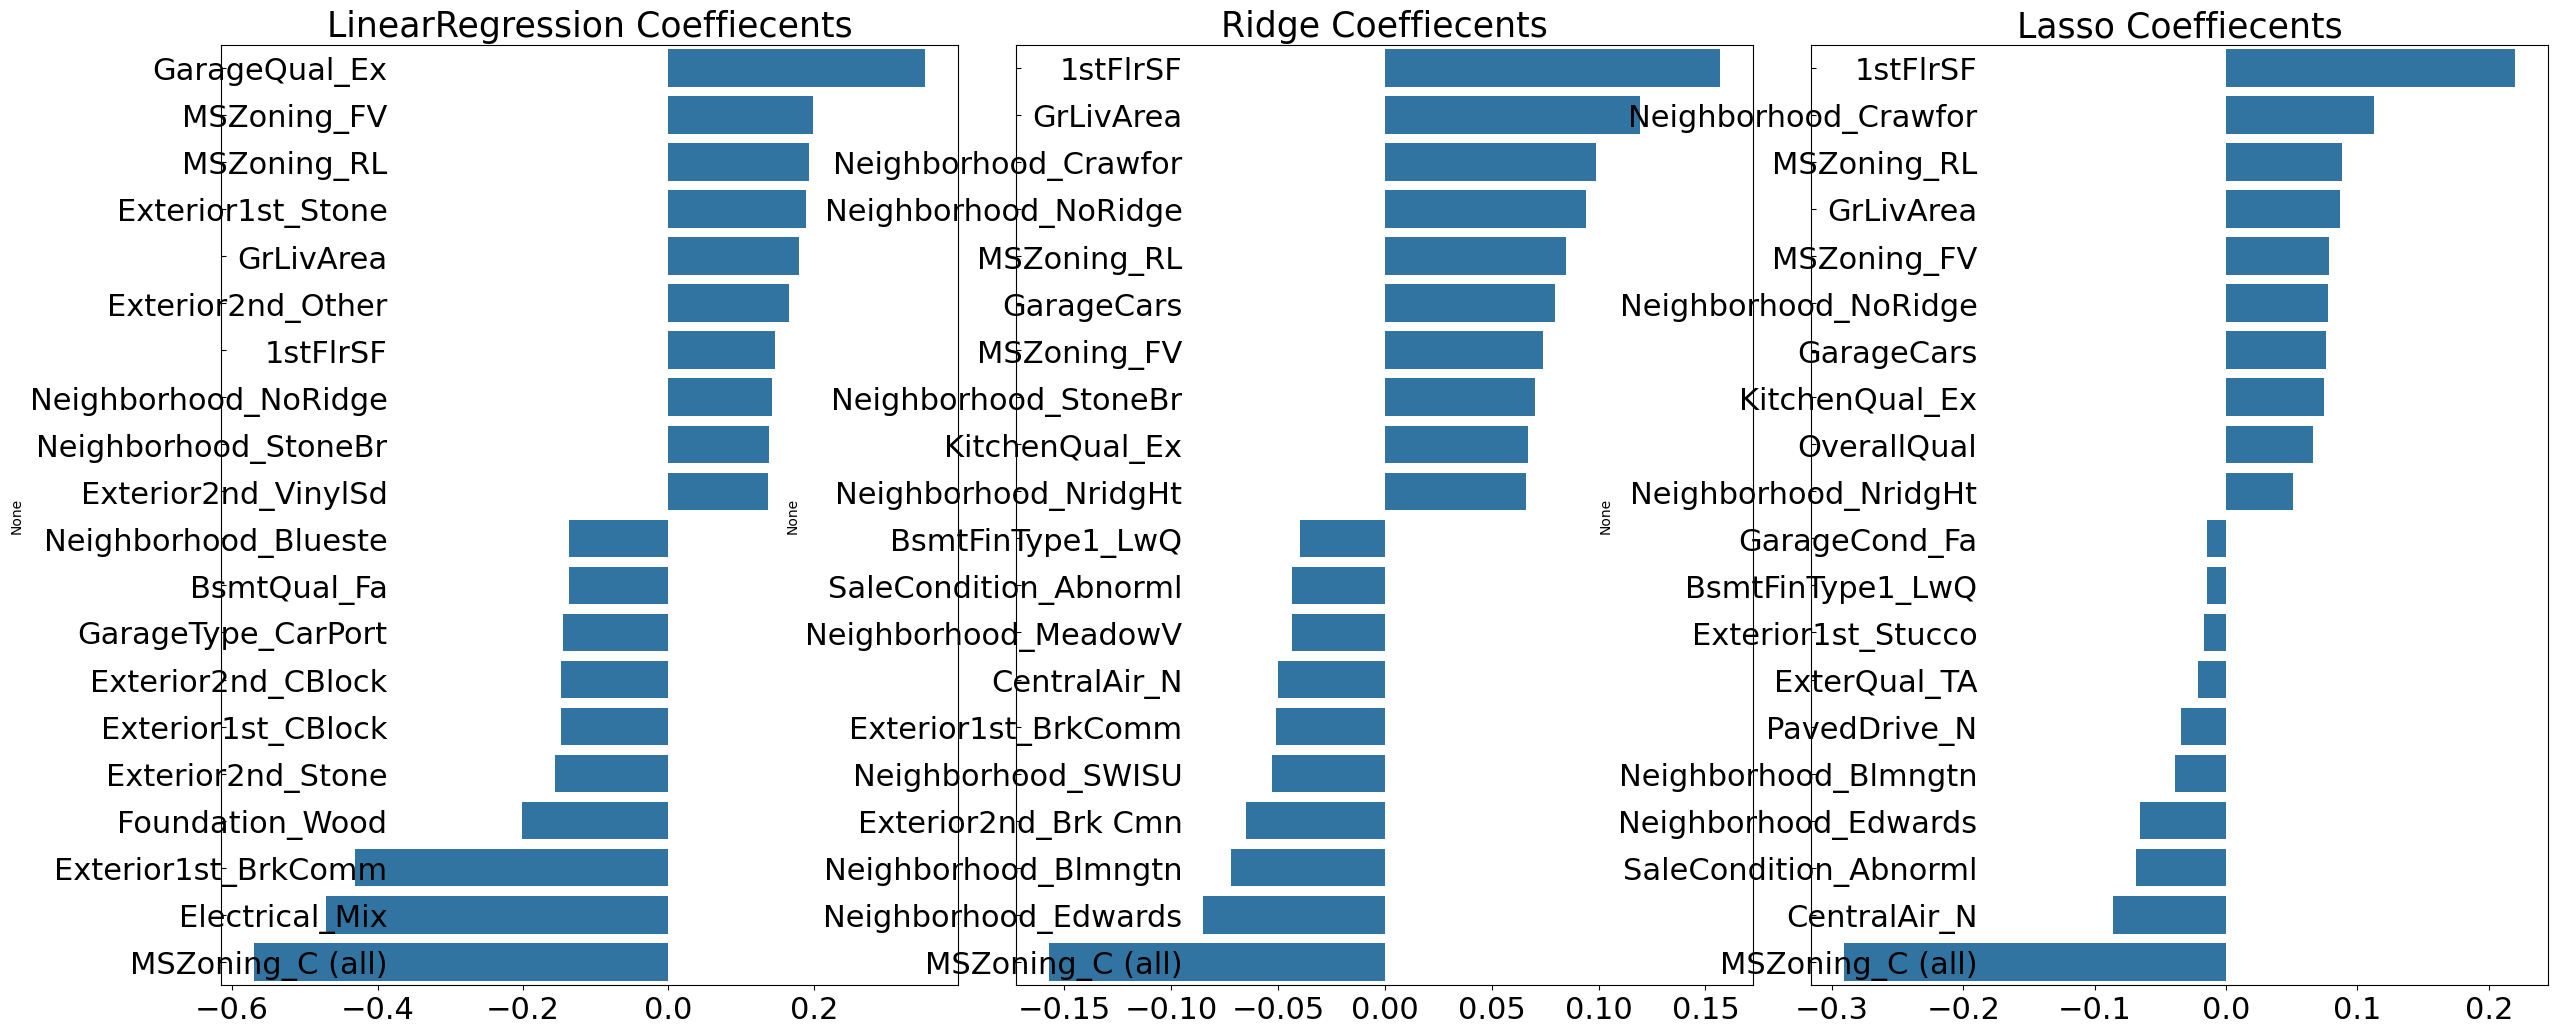

In [69]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

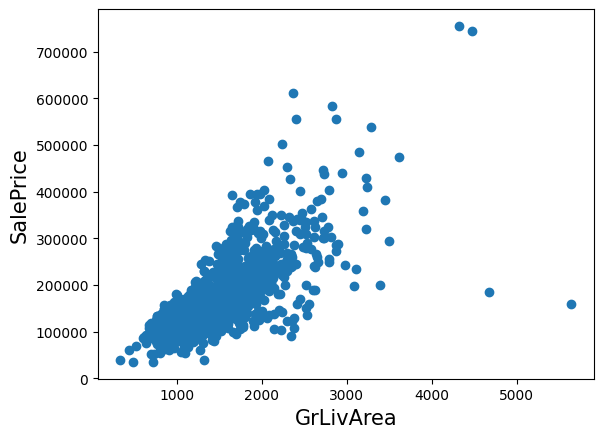

In [70]:
plt.scatter(x = house_df_org['GrLivArea'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [71]:
# GrLivArea와 SalePrice 모두 로그 변환되었으므로 이를 반영한 조건 생성.
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 house_df_ohe shape:', house_df_ohe.shape)
# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제.
house_df_ohe.drop(outlier_index , axis=0, inplace=True)
print('아웃라이어 삭제 후 house_df_ohe shape:', house_df_ohe.shape)

아웃라이어 레코드 index : [ 64 373]
아웃라이어 삭제 전 house_df_ohe shape: (1168, 150)
아웃라이어 삭제 후 house_df_ohe shape: (1166, 150)


In [73]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1296, 최적 alpha:{'alpha': 5}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1295, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.136
LinearRegression 로그 변환된 MSE: 0.018
LinearRegression 로그 변환해제 RMSE: 23326.958
LinearRegression 로그 변환해제 MSE: 544146966.835
Ridge 로그 변환된 RMSE: 0.133
Ridge 로그 변환된 MSE: 0.018
Ridge 로그 변환해제 RMSE: 23256.304
Ridge 로그 변환해제 MSE: 540855686.734
Lasso 로그 변환된 RMSE: 0.13
Lasso 로그 변환된 MSE: 0.017
Lasso 로그 변환해제 RMSE: 23671.575
Lasso 로그 변환해제 MSE: 560343440.021


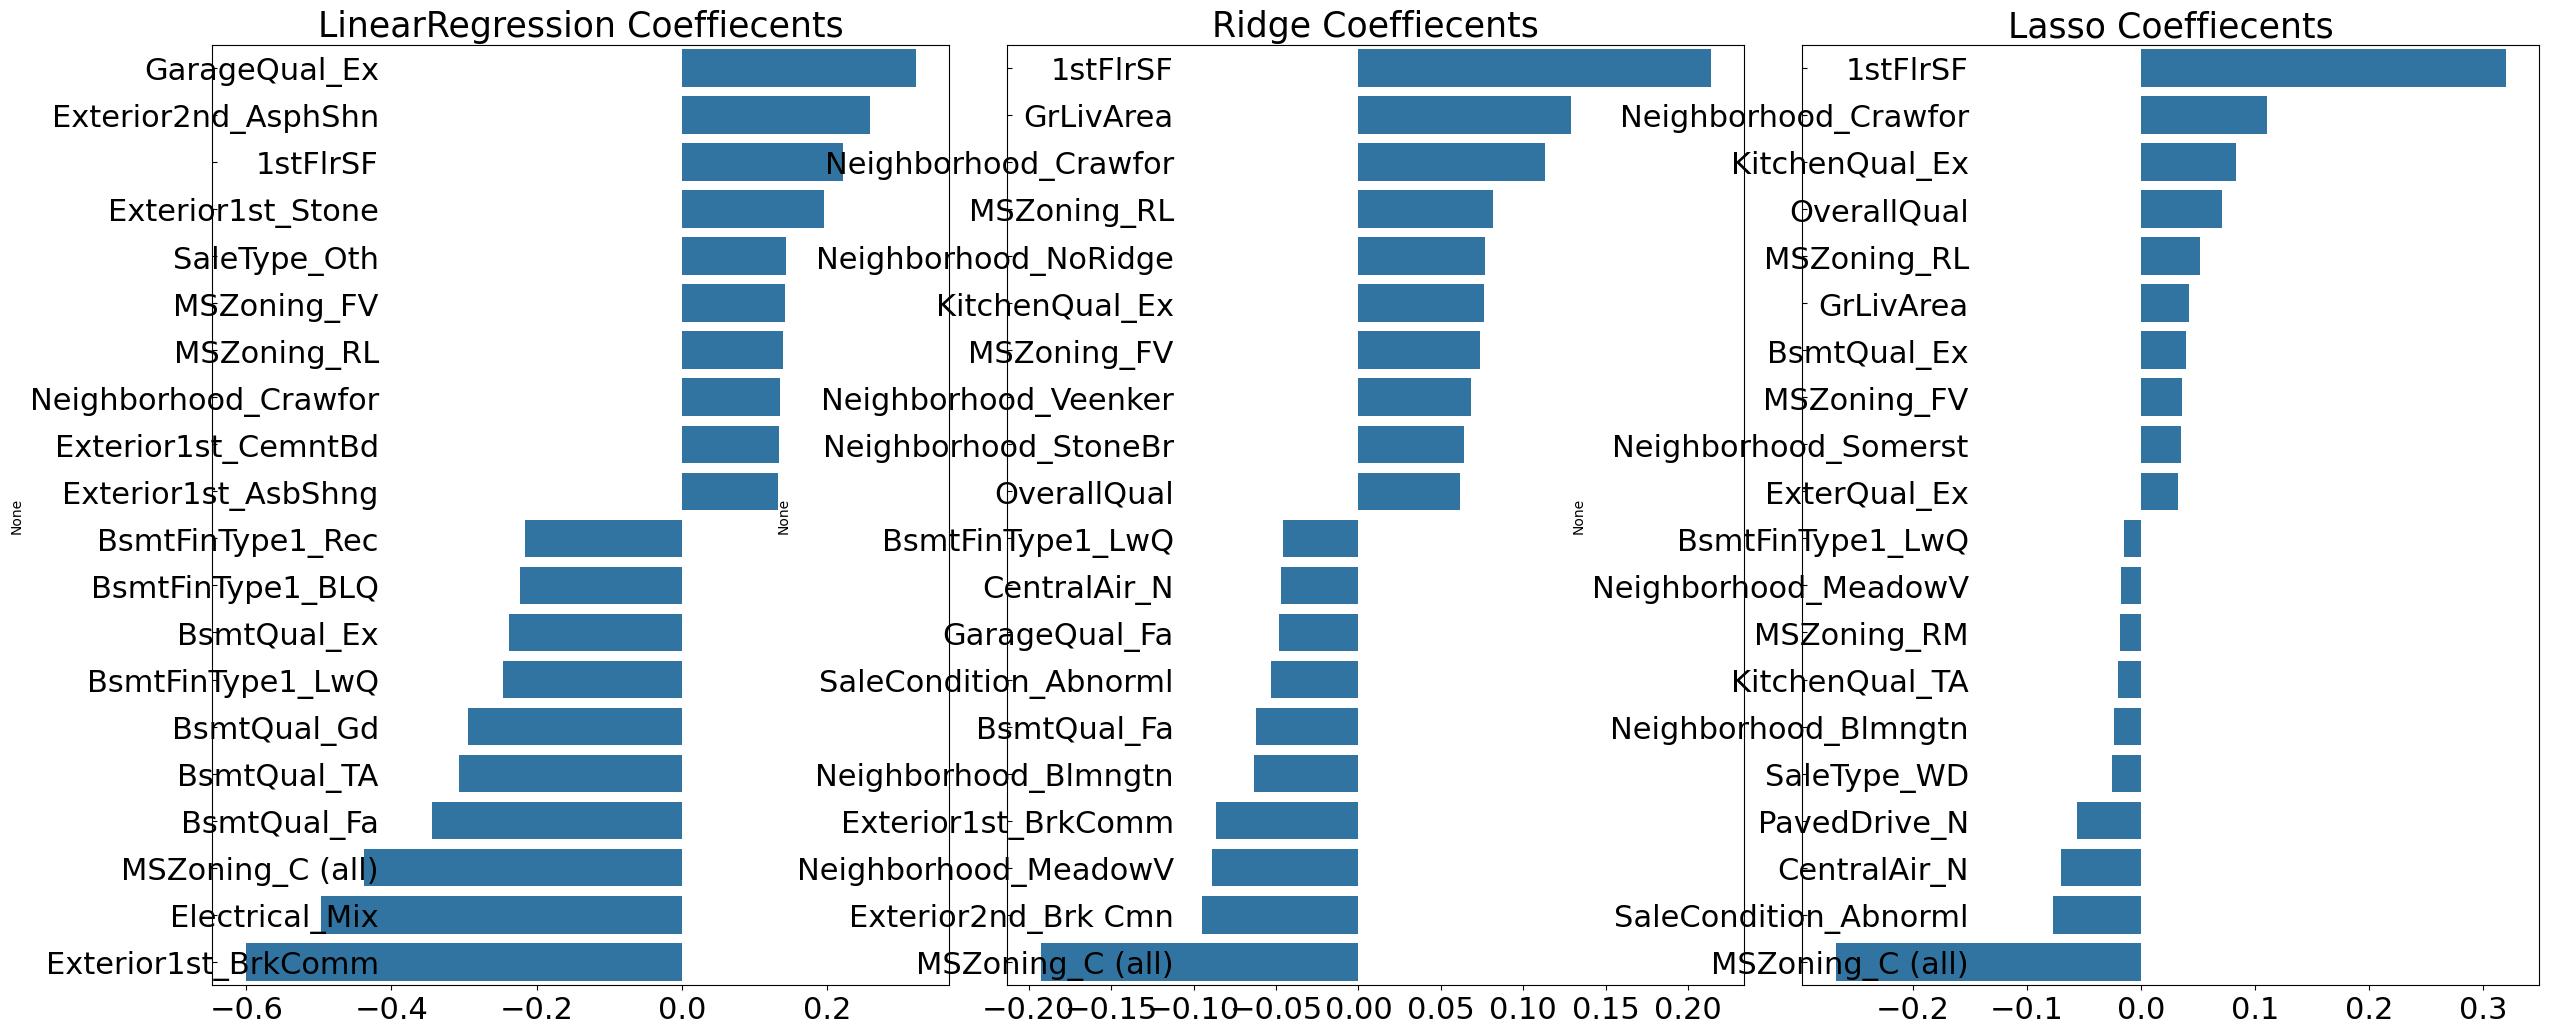

In [76]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=5)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

#Step 3 Apply Regression Models to "Train-> Predict -> Validate", Tune models with hyperparameter.

2. 회귀 트리 모델 XGBoost, LightGBM 적용해서 RMSE 확인

    - XGBoost 0.1314 > LightGBM 0.1326으로  XGBoost의 성능이 더 좋음.


In [77]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05,
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)


XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.1314, 최적 alpha:{'n_estimators': 1000}


In [78]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1995
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 100
[LightGBM] [Info] Start training from score 12.020420
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1984
[LightGBM] [Info] Number of data points in the train set: 933, number of used features: 96
[LightGBM] [Info] Start training from score 12.025656
[LightGBM] [Warning] Found wh

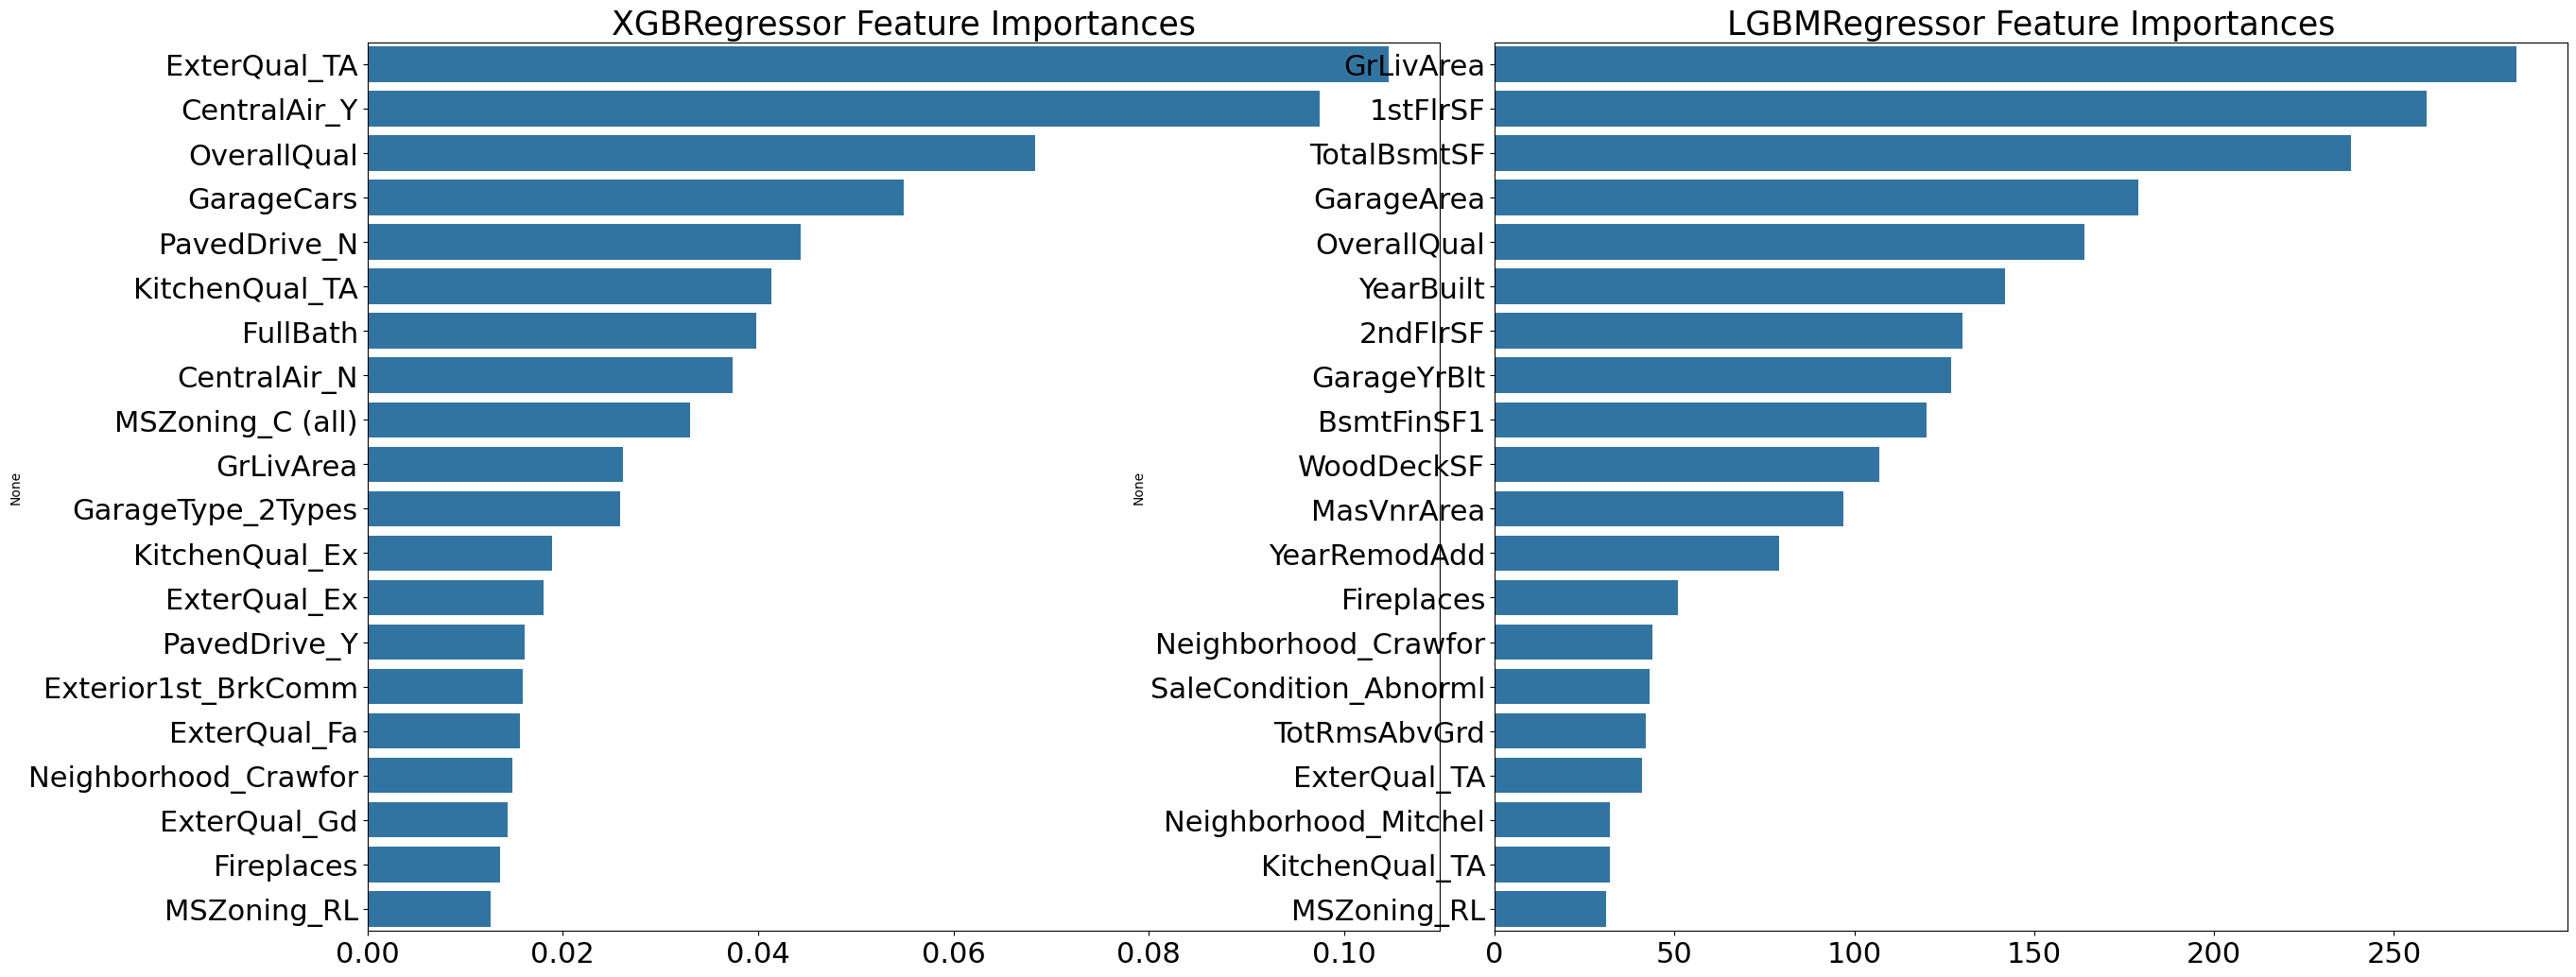

In [79]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout()
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화.
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

#Step 3 Apply Regression Models to "Train-> Predict -> Validate", Tune models with hyperparameter.

3. 선형 모델 2가지의 혼합모델 결과

  - 위에서 선형 모델 결과는  Lasso 0.130 > Ridge 0.133 > Linear 0.136 였음
  - 이중 Lasso 60 : Ridge 40으로 혼합
  - 최종 혼합 모델의 RMSE: 0.13043337659026744


4. 회귀 트리 2가지 혼합모델 결과

  - XGBoost 60 : LightGBM 40으로 혼합
  - 최종 혼합 모델의 RMSE: 0.1263555335672121

In [83]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=5)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.13043337659026744
Ridge 모델의 RMSE: 0.13271970725155108
Lasso 모델의 RMSE: 0.130387948308781


In [84]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05,
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.6 * xgb_pred + 0.4 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}

get_rmse_pred(preds)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 93
[LightGBM] [Info] Start training from score 12.029584
최종 혼합 모델의 RMSE: 0.1263555335672121
XGBM 모델의 RMSE: 0.12568133885449093
LGBM 모델의 RMSE: 0.13426980654815177


#Step 3 Apply Regression Models to "Train-> Predict -> Validate", Tune models with hyperparameter.

5. Stacking Ensemble 모델

 - 스태킹 회귀 모델의 최종 RMSE 값은: 0.1266917818817789

In [85]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')

    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장.
        test_pred[:, folder_counter] = model.predict(X_test_n)

    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [86]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환.
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환.
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1804
[LightGBM] [Info] Number of data points in the train set: 745, number of used features: 91
[LightGBM] [Info] Start training from score 12.030249
	 폴드 세트:  1  시작 
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true

In [87]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.
Stack_final_X_train = np.concatenate((ridge_train, lasso_train,
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test,
                                     xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용.
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.1266917818817789


# 제출용 Test 데이터 전처리 진행

### train에 진행된 전처리
- NUll 많은 컬럼 삭제
- skew 컬럼 로그 변환
- 원핫 인코딩

결과값의 컬럼 개수가 149개여야한다

또 test와 train의 원핫인코딩 이후 개수가 달라지는 현상이 발생하게되는데

이때는 값이 너무 많아서
```
test_ohe1 = pd.get_dummies(test)
test_ohe2 = test_ohe1.reindex(columns=X_train.columns, fill_value=0)
```
이런 방식으로 train과 열 개수를 맞춰주는 방식을 사용해봄
- 다른 방식을 사용해보셔도 좋습니다~

In [94]:
X_train.shape

(932, 149)

In [95]:
## test_data를 받아오기
test = pd.read_csv('/content/sample_data/house_price_test.csv')

In [96]:
#Data Preprocessing (Null 이 너무 많은 컬럼들(7개 columns)과 불필요한 컬럼(ID) 삭제
test.drop(['Id', 'PoolQC' , 'MiscFeature', 'Alley', 'Fence','MasVnrType', 'FireplaceQu', 'LotFrontage'], axis=1 , inplace=True)

#Data Preprocessing (SalePrice와 correlation이 0.3 미만으로 낮은 칼럼 삭제)
test.drop(['MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr' , 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'], axis=1 , inplace=True)

# Select numerical columns that are currently in the test DataFrame
num_cols_test = test.select_dtypes(include=['number']).columns
# Fill missing values in the numerical columns of the test set using the mean from the corresponding columns in the training set
test[num_cols_test] = test[num_cols_test].fillna(house_df[num_cols].mean())

test_ohe1 = pd.get_dummies(test)
test_ohe2 = test_ohe1.reindex(columns=X_train.columns, fill_value=0)

# 편향 전처리 진행 - Apply log1p only to the columns identified as skewed in the training data
# Note: We only apply the transformation to the test set using the indices from the training set's skewed features
# Ensure that the skewed columns from the training set are also present in the reindexed test set before applying log1p
skew_cols_in_test = [col for col in skew_features_top.index if col in test_ohe2.columns]
test_ohe2[skew_cols_in_test] = np.log1p(test_ohe2[skew_cols_in_test])


test_ohe2.shape

(292, 149)

# 최종 모델로 XGBoost를 선정 (RMSE가 0.12568133885449로 가장 낮음)

In [97]:
## sample_data를 받아오기
sample = pd.read_csv('/content/sample_data/sample_submission.csv')

# SalePrice 가 0으로 차있는 sample
sample

,Id,SalePrice
0,86,0
1,227,0
2,492,0
3,64,0
4,576,0
...,...,...
287,1271,0
288,903,0
289,1019,0
290,312,0


In [98]:
pred = xgb_reg.predict(test_ohe2)
# 학습시 로그변환한 target을 썻으니 결과값을 다시 복원해야합니다
pred_exp = np.expm1(pred)

# sample 파일에 예측 값을 넣어주고
sample["SalePrice"] = pred_exp

# csv로 저장하기
sample.to_csv("./submission_6.csv", index=False)

In [99]:
# 제출부분과 크기가 맞는지 확인
pred_exp.shape

(292,)

In [100]:
pred_exp

array([269993.25 , 290749.06 , 140018.48 , 142252.23 , 105716.96 ,
       291999.22 , 213498.53 , 106682.98 , 174705.84 , 141027.08 ,
       311157.28 , 193984.   ,  86880.56 , 102353.7  , 129702.14 ,
       125666.766, 129903.17 , 288818.4  , 239903.38 , 115019.03 ,
       221544.02 , 149333.39 , 139929.98 , 216893.56 , 120075.32 ,
       204471.64 , 152932.78 , 143133.92 , 347884.7  , 174670.36 ,
       186618.75 , 161496.62 , 152720.14 , 154121.53 , 173556.19 ,
       353737.38 , 109295.125, 193991.97 , 231110.5  , 151890.33 ,
       279017.66 , 225393.25 , 115195.445, 299084.94 , 146410.38 ,
       175805.78 , 121567.695, 134304.56 , 211136.81 , 171088.   ,
       182877.66 , 135820.6  , 206492.6  , 131839.19 ,  88857.39 ,
       225869.88 , 140289.28 , 204534.05 , 191943.92 , 118030.65 ,
       185386.98 , 194916.22 , 146901.56 , 117425.94 , 158623.73 ,
       126112.06 , 208597.6  , 166396.66 ,  88868.66 , 286776.94 ,
       336908.16 , 180014.9  , 224919.98 , 159042.12 , 101668.